In [66]:
%matplotlib inline
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from time import time

In [11]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [12]:
model = Sequential()

In [13]:
model.add(Dense(input_dim=784, output_dim=200, init="uniform"))
model.add(Activation("relu"))
model.add(Dense(input_dim=200, output_dim=9, init="uniform"))
model.add(Activation("softmax"))

In [14]:
# model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [15]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.1)
print "the shape of training set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the range of training set : %s ~ %s" %(trainX.min(),trainX.max())
print "the range of test set : %s ~ %s" %(testX.min(),testX.max())

escape time :  0.071 s
the shape of training set 5400 rows, 784 columns
the shape of test set 600 rows, 784 columns
the range of training set : 0.0 ~ 0.999996
the range of test set : 0.0 ~ 0.999996


In [56]:
trainX.shape

(5400, 784)

In [29]:
nb_classes = 9
batch_size = 64

nb_epoch = 20

np.random.seed(1337) # for reproducibility

In [21]:
trainY[0]

0

In [26]:
# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)

In [27]:
trainY[0]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [31]:
# model.fit(trainX, trainY, nb_epoch=10, batch_size=32)
model.fit(trainX, trainY, batch_size=batch_size, nb_epoch=nb_epoch, show_accuracy=True, verbose=2)#, validation_data=(X_test, y_test))

Epoch 0
0s - loss: 0.7274 - acc.: 0.8261
Epoch 1
0s - loss: 0.3089 - acc.: 0.9241
Epoch 2
0s - loss: 0.2772 - acc.: 0.9283
Epoch 3
0s - loss: 0.2588 - acc.: 0.9324
Epoch 4
0s - loss: 0.2469 - acc.: 0.9341
Epoch 5
0s - loss: 0.2341 - acc.: 0.9354
Epoch 6
0s - loss: 0.2266 - acc.: 0.9385
Epoch 7
0s - loss: 0.2181 - acc.: 0.9413
Epoch 8
0s - loss: 0.2119 - acc.: 0.9422
Epoch 9
0s - loss: 0.2043 - acc.: 0.9444
Epoch 10
0s - loss: 0.2000 - acc.: 0.9446
Epoch 11
0s - loss: 0.1932 - acc.: 0.9467
Epoch 12
0s - loss: 0.1892 - acc.: 0.9474
Epoch 13
0s - loss: 0.1836 - acc.: 0.9500
Epoch 14
0s - loss: 0.1776 - acc.: 0.9509
Epoch 15
0s - loss: 0.1741 - acc.: 0.9515
Epoch 16
0s - loss: 0.1709 - acc.: 0.9543
Epoch 17
0s - loss: 0.1676 - acc.: 0.9522
Epoch 18
0s - loss: 0.1635 - acc.: 0.9565
Epoch 19
0s - loss: 0.1593 - acc.: 0.9561


{'acc': [0.82611111111111113,
  0.92407407407407405,
  0.92833333333333334,
  0.93240740740740746,
  0.93407407407407406,
  0.93537037037037041,
  0.93851851851851853,
  0.9412962962962963,
  0.94222222222222218,
  0.94444444444444442,
  0.9446296296296296,
  0.94666666666666666,
  0.94740740740740736,
  0.94999999999999996,
  0.95092592592592595,
  0.95148148148148148,
  0.95425925925925925,
  0.95222222222222219,
  0.95648148148148149,
  0.95611111111111113],
 'epoch': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19],
 'loss': [0.72735061885896846,
  0.30885735849963608,
  0.27716703906319551,
  0.25883734556013088,
  0.24688940517907934,
  0.23409898125698125,
  0.22664664300376003,
  0.21812228895989935,
  0.21187619246032893,
  0.20434581892374548,
  0.20000846052895946,
  0.19319974574288343,
  0.18919538531338942,
  0.18363951673086182,
  0.17764288959188856,
  0.17410077188986917,
  0.17090913915416001,
  0.16764483688

In [43]:
score = model.evaluate(trainX, trainY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

Test score : 0.150832508515
Test accuracy : 0.960367357002


In [55]:
print model.predict_classes(trainX, batch_size=32)
print model.predict_proba(trainX, batch_size=32)

5400/5400 [==============================] - 0s     
[0 4 8 ..., 8 3 5]
5400/5400 [==============================] - 0s     
[[ 0.9945  0.0002  0.0009 ...,  0.0002  0.      0.0013]
 [ 0.0027  0.0046  0.0009 ...,  0.0018  0.0049  0.0012]
 [ 0.0008  0.      0.     ...,  0.0001  0.      0.9988]
 ..., 
 [ 0.0017  0.      0.0001 ...,  0.0007  0.      0.9971]
 [ 0.0594  0.0754  0.0534 ...,  0.0767  0.0058  0.0302]
 [ 0.0015  0.      0.0002 ...,  0.0025  0.0004  0.0012]]


In [59]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.5)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

print "the shape of training set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the range of training set : %s ~ %s" %(trainX.min(),trainX.max())
print "the range of test set : %s ~ %s" %(testX.min(),testX.max())

escape time :  0.052 s
the shape of training set 3000 rows, 784 columns
the shape of test set 1500 rows, 784 columns
the range of training set : 0.0 ~ 0.999996
the range of test set : 0.0 ~ 0.999996


In [60]:
print trainX.shape
print testX.shape
print valX.shape

(3000, 784)
(1500, 784)
(1500, 784)


In [62]:
# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

In [63]:
# model.fit(trainX, trainY, nb_epoch=10, batch_size=32)
mm = model.fit(trainX, trainY, batch_size=batch_size, nb_epoch=nb_epoch, show_accuracy=True, verbose=2, validation_data=(valX, valY))

Train on 3000 samples, validate on 1500 samples
Epoch 0
0s - loss: 0.1698 - acc.: 0.9547 - val. loss: 0.1950 - val. acc.: 0.9581
Epoch 1
0s - loss: 0.1609 - acc.: 0.9583 - val. loss: 0.2025 - val. acc.: 0.9560
Epoch 2
0s - loss: 0.1528 - acc.: 0.9587 - val. loss: 0.2029 - val. acc.: 0.9560
Epoch 3
0s - loss: 0.1486 - acc.: 0.9610 - val. loss: 0.2064 - val. acc.: 0.9469
Epoch 4
0s - loss: 0.1425 - acc.: 0.9620 - val. loss: 0.2106 - val. acc.: 0.9488
Epoch 5
0s - loss: 0.1398 - acc.: 0.9623 - val. loss: 0.2072 - val. acc.: 0.9521
Epoch 6
0s - loss: 0.1339 - acc.: 0.9640 - val. loss: 0.2200 - val. acc.: 0.9488
Epoch 7
0s - loss: 0.1310 - acc.: 0.9657 - val. loss: 0.2213 - val. acc.: 0.9482
Epoch 8
0s - loss: 0.1296 - acc.: 0.9643 - val. loss: 0.2247 - val. acc.: 0.9462
Epoch 9
0s - loss: 0.1253 - acc.: 0.9660 - val. loss: 0.2334 - val. acc.: 0.9462
Epoch 10
0s - loss: 0.1239 - acc.: 0.9663 - val. loss: 0.2298 - val. acc.: 0.9462
Epoch 11
0s - loss: 0.1212 - acc.: 0.9697 - val. loss: 0.226

In [81]:
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

Test score : 0.229587935942
Test accuracy : 0.942629179331


In [67]:
df = pd.DataFrame(mm)

In [70]:
df

,acc,epoch,loss,val_acc,val_loss
0,0.954667,0,0.169847,0.958147,0.195010
1,0.958333,1,0.160898,0.956008,0.202491
2,0.958667,2,0.152752,0.956008,0.202869
3,0.961000,3,0.148613,0.946894,0.206380
4,0.962000,4,0.142472,0.948847,0.210623
5,0.962333,5,0.139754,0.952102,0.207185
6,0.964000,6,0.133875,0.948847,0.220039
7,0.965667,7,0.130954,0.948196,0.221270
8,0.964333,8,0.129634,0.946243,0.224685
9,0.966000,9,0.125262,0.946243,0.233412


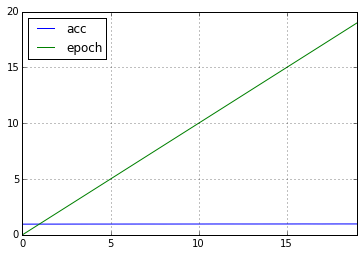

In [72]:
df[['acc', 'epoch']].plot()

In [73]:
df.index = df['epoch']

In [76]:
df.head()

,acc,epoch,loss,val_acc,val_loss
epoch,,,,,
0,0.954667,0,0.169847,0.958147,0.195010
1,0.958333,1,0.160898,0.956008,0.202491
2,0.958667,2,0.152752,0.956008,0.202869
3,0.961000,3,0.148613,0.946894,0.206380
4,0.962000,4,0.142472,0.948847,0.210623


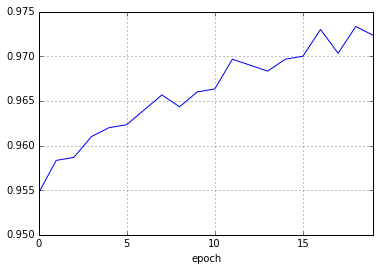

In [78]:
df['acc'].plot()

escape time :  0.055 s
Test score : 0.20626361559
Test accuracy : 0.956022036474


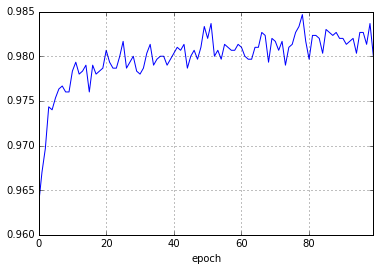

In [88]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.5)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

escape time :  0.053 s
Test score : 0.124032552271
Test accuracy : 0.961348684211


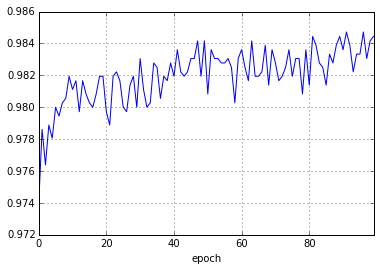

In [90]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.4)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

escape time :  0.056 s
Test score : 0.137858647161
Test accuracy : 0.964439655172


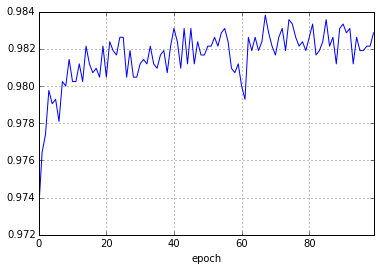

In [91]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.3)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

escape time :  0.048 s
Test score : 0.10708346727
Test accuracy : 0.96875


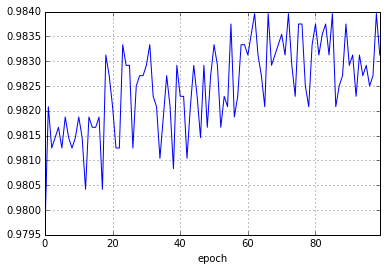

In [92]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.2)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

escape time :  0.046 s
Test score : 0.066358979782
Test accuracy : 0.984375


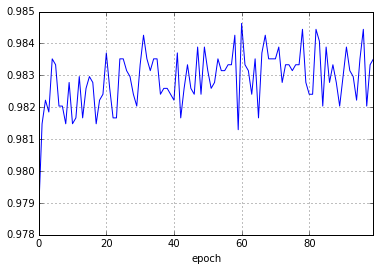

In [93]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.1)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

escape time :  0.14 s
Test score : 0.0371070522049
Test accuracy : 0.99375


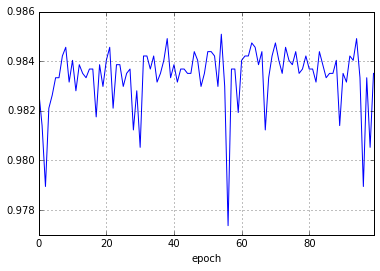

In [94]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.05)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

In [95]:
trainX.shape

(5700, 784)

escape time :  0.084 s
Test score : 0.0050450559004
Test accuracy : 1.0


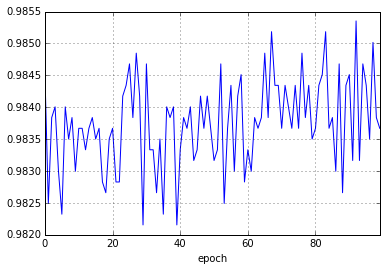

In [96]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.01)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

In [97]:
trainX.shape

(5940, 784)

escape time :  0.061 s
Test score : 0.000951026579495
Test accuracy : 1.0
(5994, 784)


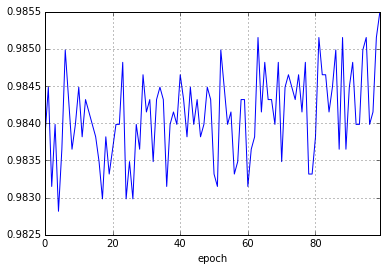

In [98]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.001)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

print trainX.shape

escape time :  0.048 s
Test score : 0.0517750444463
Test accuracy : 0.986842105263
(4800, 784)


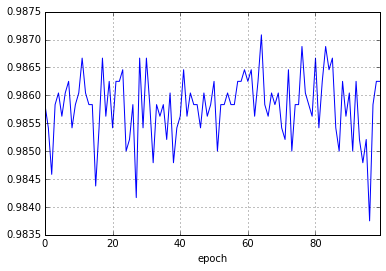

In [106]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.2)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

print trainX.shape
print testX.shape
print valX.shape

In [105]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.5)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)
print trainX.shape
print testX.shape
print valX.shape

escape time :  0.052 s
(3000, 784)
(1500, 784)
(1500, 784)
